In [0]:
%matplotlib inline

import numpy as np
import torch
import matplotlib.pyplot as plt

#from helper2 import generate_dataset, visualize_one_dataset, visualize_datasets, predict_grid, visualize_predictions
from torch.utils import data

%load_ext autoreload
%autoreload 2

import torchvision

from time import time
from torchvision import datasets, transforms
from torch import nn, optim

from helpers_nn import *
from sdlbfgs import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [0]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

### MNIST dataset
The MNIST dataset is loaded.

In [0]:
trainset = datasets.MNIST('', download=True, train=True, transform=transform)
valset = datasets.MNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

In [0]:
print("Training and test sets information is displayed.\n\n")
print("Trainset:\n",trainset)
print("Testset:\n",valset)

Training and test sets information is displayed.


Trainset:
 Dataset MNIST
    Number of datapoints: 60000
    Root location: 
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )
Testset:
 Dataset MNIST
    Number of datapoints: 10000
    Root location: PATH_TO_STORE_TESTSET
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )


In [0]:
print(valloader)
len(valloader)

157

64 images in each batch and each image has a dimension of 28 x 28 pixels


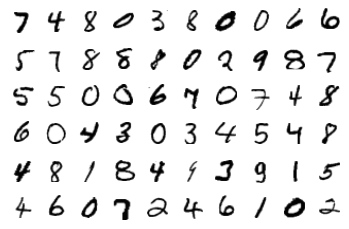

In [0]:
# A subset of a batch is plotted to show a sample of the dataset. 
dataiter = iter(trainloader)
images, labels = dataiter.next()
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

# Neural Network 

### Model definition
The model is defined, specifying the structure of the neural network.

### Model A: FCNN
Fully connected neural network, with hidden layer structure through vector *hidden_sizes*.

In [0]:
# Input and output sizes and network structure are defined.
input_size = 784
output_size = 10
sizes = [input_size,128,64,output_size]

# The model is built
modelA=fully_connected_NN(sizes)
print(modelA)

# Loss of the model is defined.
criterion = nn.NLLLoss()

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)


### Model B: CNN
Convolutional neural network composed of two convolutional layers and two fully connected layers.

In [0]:
images,_=dataiter.next()
image_size=images[0].shape[1]
# Using nn.CrossEntropyLoss allows to avoid specifying LogSoftmax as final layer.
criterion = nn.CrossEntropyLoss()
# Depending on the size of the image, a CNN model is built.
modelB=ConvNet(image_size)

# SGD learning rate optimization 



### Fully connected network

In [0]:
grid =[ 1e-3, 1e-2, 1e-1,  0.5]


In [0]:
epochs = 30
training_loss_fcnn, test_loss_fcnn,training_accuracy_fcnn, test_accuracy_fcnn, time_fcnn =learning_rate_optimization_SGD(input_size, output_size, trainloader, valloader, grid,epochs)

Learning rates to try: [0.001, 0.01]
Epoch 0
Training loss: 1.0751780746047939
Number Of Images Tested = 10000
Model Accuracy = 0.8854
Number Of Images Tested = 60000
Model Accuracy = 0.8805333333333333
Test loss: 0.4288464496090154 

Epoch 1
Training loss: 0.3788320175699715
Number Of Images Tested = 10000
Model Accuracy = 0.9062
Number Of Images Tested = 60000
Model Accuracy = 0.9015
Test loss: 0.3314061969708485 


Training Time (in minutes) = 1.096491535504659
Epoch 0
Training loss: 0.41720618470423004
Number Of Images Tested = 10000
Model Accuracy = 0.9355
Number Of Images Tested = 60000
Model Accuracy = 0.9364333333333333
Test loss: 0.21473869574582502 

Epoch 1
Training loss: 0.15603761302072927
Number Of Images Tested = 10000
Model Accuracy = 0.9503
Number Of Images Tested = 60000
Model Accuracy = 0.9558166666666666
Test loss: 0.1581178080931211 


Training Time (in minutes) = 1.102220094203949


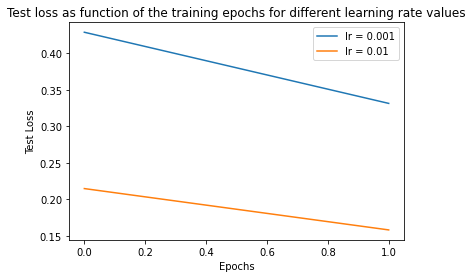

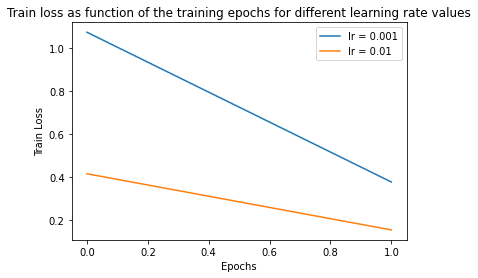

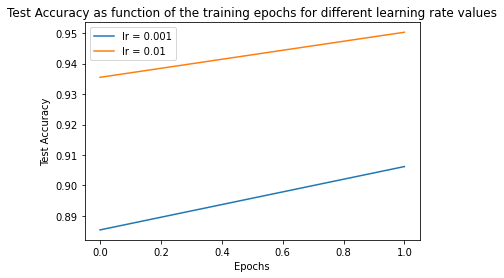

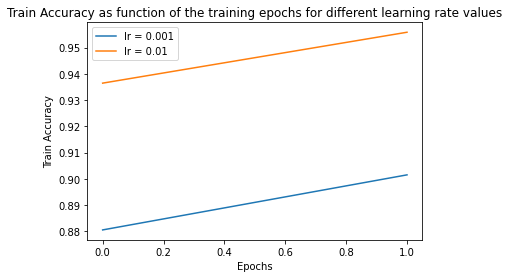

In [0]:

for index,lr in enumerate(grid):
  plt.figure(1, figsize = (12,10))
  plt.plot(test_loss_fcnn[index],label='lr = {}'.format(lr))
  plt.figure(2, figsize = (12,10))
  plt.plot(training_loss_fcnn[index],label='lr = {}'.format(lr))
  plt.figure(3, figsize = (12,10))
  plt.plot(test_accuracy_fcnn[index],label='lr = {}'.format(lr))
  plt.figure(4, figsize = (12,10))
  plt.plot(training_accuracy_fcnn[index],label='lr = {}'.format(lr))
  
plt.figure(1)
plt.xlabel('Epochs')
plt.ylabel('Test Loss')
plt.title('SGD Test loss in FCNN for different learning rates',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("test_loss_fcnn.jpg")
plt.figure (2)
plt.xlabel('Epochs')
plt.ylabel('Train Loss')
plt.title('SGD Train loss in FCNN for different learning rates',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("train_loss_fcnn.jpg")
plt.figure (3)
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.title('SGD Test accuracy in FCNN for different learning rates',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("test_acc_fcnn.jpg")
plt.figure (4)
plt.xlabel('Epochs')
plt.ylabel('Train Accuracy')
plt.title('SGD Train accuracy in FCNN for different learning rates',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("train_acc_fcnn.jpg")

In [0]:
np.savetxt('SGD_fcNN_trainloss.txt', training_loss_fcnn)
np.savetxt('SGD_fcNN_testloss.txt', test_loss_fcnn)
np.savetxt('SGD_fcNN_trainacc.txt', training_accuracy_fcnn)
np.savetxt('SGD_fcNN_testacc.txt', test_accuracy_fcnn)
np.savetxt('SGD_fcNN_times.txt',time_fcnn)

### CNN

In [0]:
epochs = 30

grid =[ 1e-3,1e-2, 1e-1]

training_loss_cnn, test_loss_cnn,training_accuracy_cnn, test_accuracy_cnn,time_cnn =learning_rate_optimization_SGD_CNN(input_size, output_size, trainloader, valloader, grid,epochs)

Learning rates to try: [0.1]
Epoch 0
Training loss: 0.48550626537057634
Number Of Images Tested = 10000
Model Accuracy = 0.8688
Number Of Images Tested = 60000
Model Accuracy = 0.86465
Test loss: 0.4209747765284435 


Training Time (in minutes) = 4.049566523234049


In [0]:
test_loss_cnn = [[0.1,0.2], [0.4,0.5]]

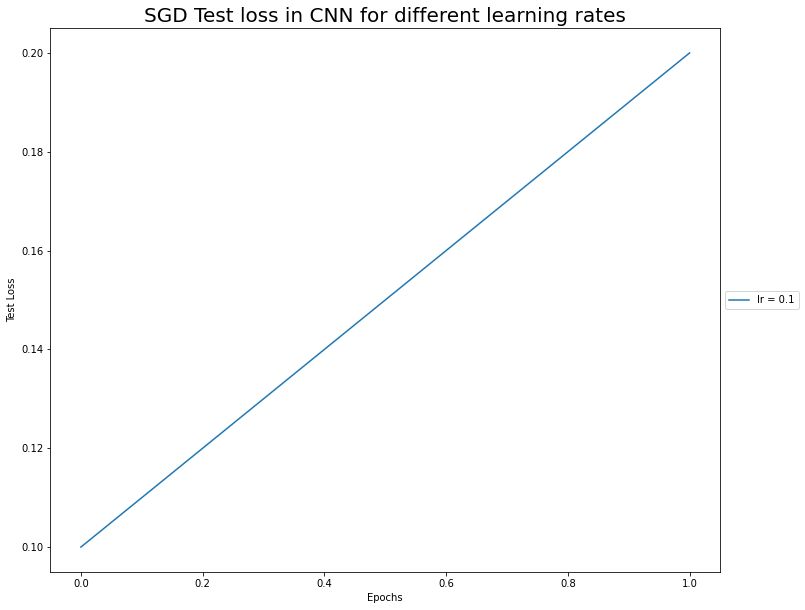

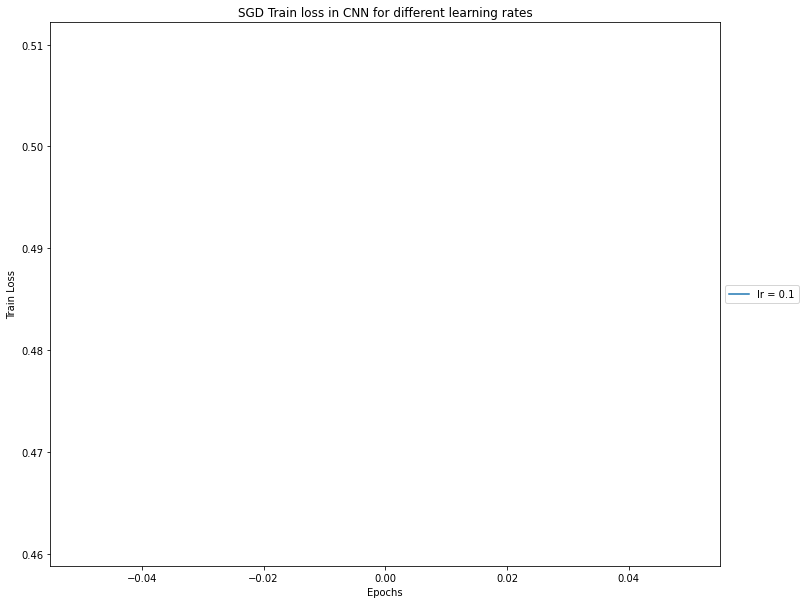

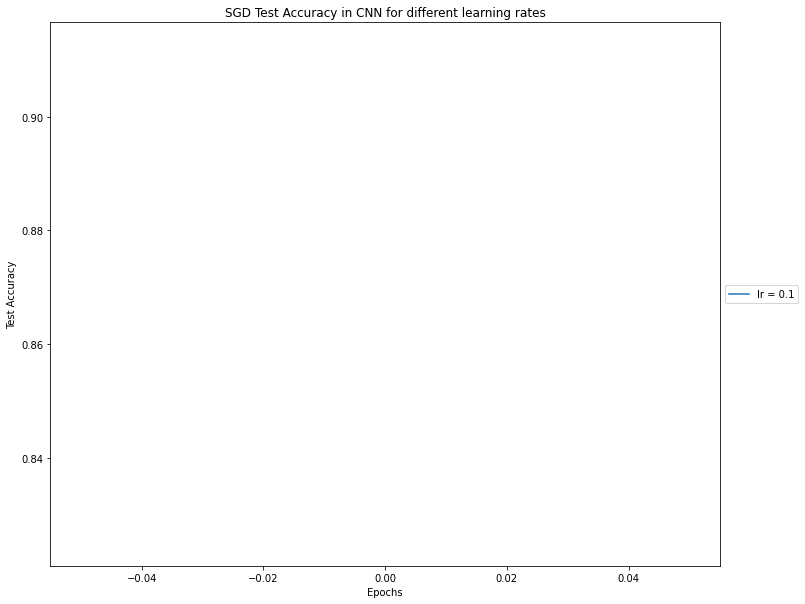

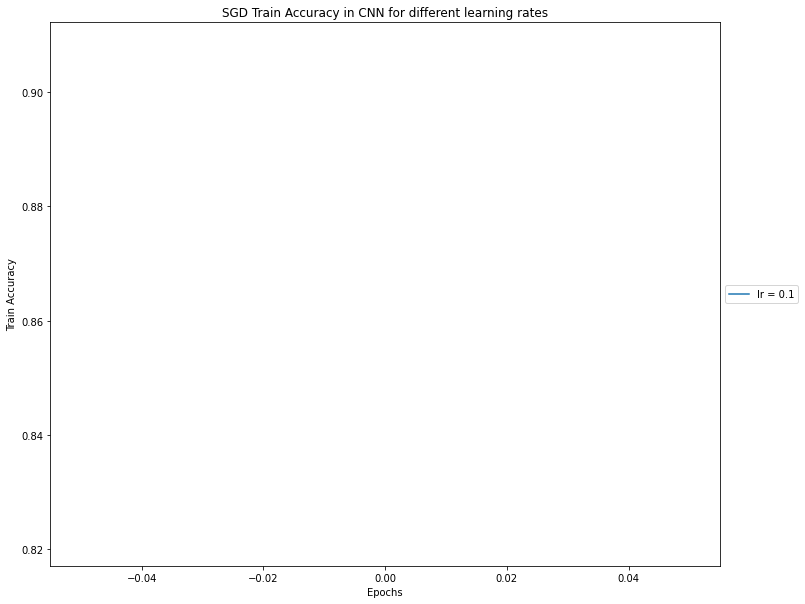

In [0]:
for index,lr in enumerate(grid):
  plt.figure(1, figsize = (12,10))
  plt.plot(test_loss_cnn[index],label='lr = {}'.format(lr))
  plt.figure(2, figsize = (12,10))
  plt.plot(training_loss_cnn[index],label='lr = {}'.format(lr))
  plt.figure(3, figsize = (12,10))
  plt.plot(test_accuracy_cnn[index],label='lr = {}'.format(lr))
  plt.figure(4, figsize = (12,10))
  plt.plot(training_accuracy_cnn[index],label='lr = {}'.format(lr))
  
plt.figure(1)
plt.xlabel('Epochs')
plt.ylabel('Test Loss')
plt.title('SGD Test loss in CNN for different learning rates',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
plt.savefig("test_loss_cnn.jpg")
plt.figure (2)
plt.xlabel('Epochs')
plt.ylabel('Train Loss')
plt.title('SGD Train loss in CNN for different learning rates',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
plt.savefig("train_loss_cnn.jpg")
plt.figure (3)
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.title('SGD Test Accuracy in CNN for different learning rates',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
plt.savefig("test_acc_cnn.jpg")
plt.figure (4)
plt.xlabel('Epochs')
plt.ylabel('Train Accuracy')
plt.title('SGD Train Accuracy in CNN for different learning rates',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
 plt.savefig("train_acc_cnn.jpg")


In [0]:
np.savetxt('SGD_CNN_trainloss.txt', training_loss)
np.savetxt('SGD_CNN_testloss.txt', test_loss)
np.savetxt('SGD_CNN_trainacc.txt', training_accuracy)
np.savetxt('SGD_CNN_testacc.txt', test_accuracy])
np.savetxt('SGD_CNN_times.txt',time)